In [43]:
import torch
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

# Exercise 1. Total variation

In parametric statistics we are interested in estimating parameters of the distribution. In order to do that, we need to define an appropriate distance metric between the distributions. Such a common metric in classical statistics is total variation, which is defined as $TV(P, Q) = \max_{A \in E}{|P(A) - Q(A)|}$, where $E$ is the union of domains of $P$ and $Q$.  Total variation is a proper distance, meaning that it satisfies the following properties:
$$
TV(P, Q) = TV(Q,P) \ (\text{symmetric}) \\
TV(P, Q) \geq 0 \ (\text{positive}) \\
\text{if} \ TV(P, Q) = 0, \ \text{then} \  P = Q \ (\text{definite}) \\
TV(P, Q) \leq TV(P, K) + TV(K, Q) \ (\text{triangle inequality})
$$

$\textbf{Your task is to prove these properties} \\ $
Write your solutions in LateX or attach a picture in the answer cell provided below. You can add a picture using the command ```![1](imagename_in_the_folder.jpg)```. Latex in here works similarly as you would write it normally!

YOUR ANSWER HERE


### a. Symmetry: 
To prove: $TV(P, Q) = TV(Q, P)$

We know 

$
TV(P, Q) = \max_{A \in E} |P(A) - Q(A)|
$

$ 
TV(Q, P) = \max_{A \in E} |Q(A) - P(A)|
$

Since $|Q(A) - P(A)| = |-(P(A) - Q(A))| = |P(A) - Q(A)| $ for all $A \in E $ (by the properties of absolute value)

Therefore, 
$
TV(P, Q) = TV(Q, P).
$
Thus, the symmetry property holds.


### b. Positivity: 
To prove: $TV(P, Q) \geq 0$

We know

$
TV(P, Q) = \max_{A \in E} |P(A) - Q(A)|.
$

Since $|P(A) - Q(A)| \geq 0 $ for all $ A \in E $ since absolute values are non-negative, and the maximum of non-negative numbers is also non-negative. Thus, 
$
TV(P, Q) \geq 0.
$
Therefore, the positivity property is satisfied.

### c. Definiteness: 
To prove: If $ TV(P, Q) = 0 $, then $ P = Q $

Suppose:

$
TV(P, Q) = \max_{A \in E} |P(A) - Q(A)| = 0.
$

This implies that for all $ A \in E $:

$
|P(A) - Q(A)| \leq 0.
$

Since $ |P(A) - Q(A)| \geq 0 $ by definition of absolute value, it must be that:

$
|P(A) - Q(A)| = 0 \quad \text{for all } A \in E,
$

which means:

$
P(A) = Q(A) \quad \text{for all } A \in E.
$

Thus, $ P = Q $, confirming the definiteness property.

### d. Triangle Inequality: 
To prove: $ TV(P, Q) \leq TV(P, K) + TV(K, Q) $

Let $K$ be another probability distribution on  $E$. For any $A \in E$, consider:

$
P(A) - Q(A) = P(A) - K(A) + K(A) - Q(A).
$

Taking absolute values and applying the triangle inequality for real numbers:

$
|P(A) - Q(A)| \leq |P(A) - K(A)| + |K(A) - Q(A)|.
$

Since this holds for all $A \in E $, we take the maximum over $ A $:

$
\max_{A \in E} |P(A) - Q(A)| \leq \max_{A \in E} |P(A) - K(A)| + \max_{A \in E} |K(A) - Q(A)|,
$

which is:

$
TV(P, Q) \leq TV(P, K) + TV(K, Q).
$
Therefore, the triangle inequality is satisfied.

When both $P$ and $Q$ are either discrete or continuous, TV can be computed as $\frac{1}{2}{\sum_{x \in E}}{|P(x) - Q(x)|}$ or $\frac{1}{2}{\int_{x \in E}}{|P(x) - Q(x)| dx}$. $ \\ $ However, despite the intuative definition, TV has a major disadvantage - we cannot easily construct an estmator out of it, when we have access only to samples of target distribution $P$ and our goal is to infer parameters of $Q$. Hence, we need to define more appealing metric.

# Exercise 2. KL divergence

KL divergence is, probably, the most popular statistical metric for measuring how $P$ is close to $Q$. Mathematically KL is not a distance, in general it does not satisfy properties of symmetry and triangle inequality, however, it does not really affect the applicability of this metric. KL is still positive and definite and positiviness is proved by employing Jensen's inequality. This inequality appears a lot when deriving lower bounds for latent variable models (next lectures), so lets focus on it a little bit.

### Jensen’s inequality

if $X$ is a random variable and $f$ is a convex function, then
$$
f(\mathbb{E}[f(X)]) \leq \mathbb{E}[f(X)]
$$

A differentiable real-valued function f of a single variable is called convex if the first order Taylor approximation of f is an underestimate of the function, that is
$$
f(c) + (x-c) f'(c) \leq f(x)
$$
for every $c$ and $x$.

This definition of the convexity differs from the canonical one, however is more useful for proving inequality. $\textbf{Your task is to prove Jensen’s inequality}$. (Hint: choose $c$ as $\mathbb{E}[X])$. Write your solutions in LateX or attach a picture in the answer cell provided below. You can add a picture using the command ```![1](imagename_in_the_folder.jpg)```. Latex in here works similarly as you would write it normally!

YOUR ANSWER HERE

### Solution: 
We know f is convex i.e.
$
f(x) \ge f(c) + f'(c)(x-c).
$

Choosing $c = \mathbb{E}[X]$ yields:

$
f(x) \ge f(\mathbb{E}[X]) + f'(\mathbb{E}[X])(x - \mathbb{E}[X]).
$

Taking the expectation with respect to \(X\) on both sides gives:


$
\mathbb{E}[f(X)] \ge \mathbb{E}\left[ f(\mathbb{E}[X]) + (X - \mathbb{E}[X]) f'(\mathbb{E}[X]) \right] 
$

We know \mathbb{E} is a linear operator
$
=> \mathbb{E}[f(X)] \ge \mathbb{E}[ f(\mathbb{E}[X])] + \mathbb{E}[(X - \mathbb{E}[X])] \mathbb{E}\left[f'(\mathbb{E}[X]) \right] 
$

We know 

$ f(\mathbb{E}[X]) $ is a constant (it does not depend on $ X $) and  $ f'(\mathbb{E}[X])$ is also a constant.

Therefore, 

$
=> \mathbb{E}[f(X)] \ge f(\mathbb{E}[X]) + f'(\mathbb{E}[X])\mathbb{E}\left[X - \mathbb{E}[X]\right].
$

Noting that
$
\mathbb{E}[X - \mathbb{E}[X]] = 0,
$

we conclude that

$
\mathbb{E}[f(X)] \ge f(\mathbb{E}[X]).
$
This completes the proof of Jensen's inequality.


To start exploring KL, we will consider a situation, where we want to minimise KL between two distributions: the target distribution $p$ is known to us and for the approximation distribution $q$ we know its parametric form. For simplicity, we will assume that both distributions belong to the Gaussian family. $\textbf{Your task is to optimise parameters of $q$ using the gradient descent}$. Below N(a, b) corresonds to normal distribution with mean $a$ and variance $b$.

In [138]:
def KL(mean, log_var, mean_target, log_var_target):
    """
    Args:
        mean: mean of normal distribution q which we optimise
        log_var: log of variance of normal distribution q which we optimise
        mean_target: mean of target normal distribution p which is known
        log_var_target: log of variance of target normal distribution p which is known
        
    Returns:
        KL between p and q
    """
    # YOUR CODE HERE
    q_var = torch.exp(log_var)
    p_var = torch.exp(log_var_target)
    kl = 0.5 * (torch.log(q_var) - torch.log(p_var) + (p_var + (mean_target - mean)**2) / q_var - 1)

    #raise NotImplementedError()
    return kl
    

In [139]:
res = KL(torch.tensor(0),torch.tensor(1).log(),torch.tensor(0),torch.tensor(3).log()).item()
eps = 0.001

diff = abs(res - 0.4506938)
assert diff < eps, \
print(f"KL between N(0,1) and N(0, 3) do not allign, the absolute value difference is {diff}")
print("Success")

Success


In [140]:
# Here is a hidden test


In [141]:
mean = torch.nn.Parameter(torch.randn(1))
log_var = torch.nn.Parameter(torch.randn(1))

mean_target = torch.tensor(5)
log_var_target = torch.log(torch.tensor(2.0))

num_iterations = 5000
optimiser = torch.optim.Adam([mean, log_var], lr=1e-2)

In [142]:
for i in range(num_iterations):
    optimiser.zero_grad()
    loss = KL(mean, log_var, mean_target, log_var_target)
    if i % 100 == 0:
        print('Iter %d/%d - KL Loss: %.3f' % (i, num_iterations, loss.item()), flush=True)
    loss.backward()
    optimiser.step()

print("optimised mean: ", mean.item())

print("optimised variance: ", log_var.exp().item())

Iter 0/5000 - KL Loss: 31.265
Iter 100/5000 - KL Loss: 9.412
Iter 200/5000 - KL Loss: 4.381
Iter 300/5000 - KL Loss: 2.499
Iter 400/5000 - KL Loss: 1.600
Iter 500/5000 - KL Loss: 1.105
Iter 600/5000 - KL Loss: 0.803
Iter 700/5000 - KL Loss: 0.606
Iter 800/5000 - KL Loss: 0.470
Iter 900/5000 - KL Loss: 0.370
Iter 1000/5000 - KL Loss: 0.295
Iter 1100/5000 - KL Loss: 0.236
Iter 1200/5000 - KL Loss: 0.188
Iter 1300/5000 - KL Loss: 0.148
Iter 1400/5000 - KL Loss: 0.116
Iter 1500/5000 - KL Loss: 0.089
Iter 1600/5000 - KL Loss: 0.066
Iter 1700/5000 - KL Loss: 0.049
Iter 1800/5000 - KL Loss: 0.035
Iter 1900/5000 - KL Loss: 0.024
Iter 2000/5000 - KL Loss: 0.016
Iter 2100/5000 - KL Loss: 0.011
Iter 2200/5000 - KL Loss: 0.007
Iter 2300/5000 - KL Loss: 0.004
Iter 2400/5000 - KL Loss: 0.003
Iter 2500/5000 - KL Loss: 0.002
Iter 2600/5000 - KL Loss: 0.001
Iter 2700/5000 - KL Loss: 0.001
Iter 2800/5000 - KL Loss: 0.000
Iter 2900/5000 - KL Loss: 0.000
Iter 3000/5000 - KL Loss: 0.000
Iter 3100/5000 - KL

In [143]:
eps = 0.1
assert abs(mean.detach().item() - mean_target) < eps, \
print(f"Means do not allign, the absolute value difference is {abs(mean.detach().item() - mean_target)}")
assert abs(log_var.detach().item() - log_var_target) < eps,\
print(f"log variances do not allign, the absolute value difference is {abs(log_var.detach().item() - log_var_target)}")

print("Success")

Success


Lets draw the resulting densities

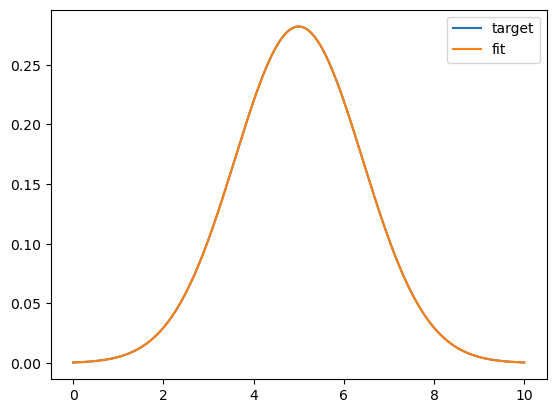

In [144]:
x = np.linspace(0,10,1000)
target_pdf = scipy.stats.norm(mean_target, log_var_target.exp().sqrt().numpy()).pdf(x)
fit_pdf = scipy.stats.norm(mean.detach().numpy(), log_var.exp().sqrt().detach().numpy()).pdf(x)

plt.plot(x, target_pdf, label="target")
plt.plot(x, fit_pdf, label="fit")
plt.legend()
plt.show()

In most real cases, of course, we are not provided with the target distribution, but rather can observe samples from it. However, we can still define a parametric form for $q$ and minimise KL between emperical distribution of the data and $q$. Assume that $q$ belongs to the Gaussian family again. $\textbf{Your task is to optimise parameters of $q$ using the gradient descent}$.

In [145]:
def loss_function(mean, log_var, samples, N):
    """
    Args:
        mean: mean of normal distribution q which we optimise
        log_var: log of variance of normal distribution q which we optimise
        samples: samples from the unknown distribution p
        N: number of samples
        
    Returns:
        objective for minimising KL
    """
    # YOUR CODE HERE
    var = torch.exp(log_var)
    nll = 0.5 * np.log(2 * np.pi) + 0.5 * log_var + (samples - mean)**2 / (2 * var)
    loss = nll.mean() 
    #raise NotImplementedError()
    return loss

In [146]:
mean = torch.nn.Parameter(torch.randn(1))
log_var = torch.nn.Parameter(torch.randn(1))
optimiser = torch.optim.Adam([mean, log_var], lr=1e-2)
N = 50000
samples = torch.randn(N) * torch.sqrt(log_var_target.exp()) + mean_target

In [147]:
for i in range(num_iterations):
    optimiser.zero_grad()
    loss = loss_function(mean, log_var, samples, N)
    if i % 100 == 0:
        print('Iter %d/%d - KL Loss: %.3f' % (i, num_iterations, loss.item()), flush=True)
    loss.backward()
    optimiser.step()

print("optimised mean: ", mean.item())

print("optimised variance: ", log_var.exp().item())

Iter 0/5000 - KL Loss: 16.326
Iter 100/5000 - KL Loss: 6.251
Iter 200/5000 - KL Loss: 3.978
Iter 300/5000 - KL Loss: 3.149
Iter 400/5000 - KL Loss: 2.758
Iter 500/5000 - KL Loss: 2.540
Iter 600/5000 - KL Loss: 2.400
Iter 700/5000 - KL Loss: 2.299
Iter 800/5000 - KL Loss: 2.218
Iter 900/5000 - KL Loss: 2.147
Iter 1000/5000 - KL Loss: 2.081
Iter 1100/5000 - KL Loss: 2.020
Iter 1200/5000 - KL Loss: 1.962
Iter 1300/5000 - KL Loss: 1.910
Iter 1400/5000 - KL Loss: 1.866
Iter 1500/5000 - KL Loss: 1.831
Iter 1600/5000 - KL Loss: 1.806
Iter 1700/5000 - KL Loss: 1.790
Iter 1800/5000 - KL Loss: 1.780
Iter 1900/5000 - KL Loss: 1.775
Iter 2000/5000 - KL Loss: 1.772
Iter 2100/5000 - KL Loss: 1.771
Iter 2200/5000 - KL Loss: 1.770
Iter 2300/5000 - KL Loss: 1.770
Iter 2400/5000 - KL Loss: 1.770
Iter 2500/5000 - KL Loss: 1.770
Iter 2600/5000 - KL Loss: 1.770
Iter 2700/5000 - KL Loss: 1.770
Iter 2800/5000 - KL Loss: 1.770
Iter 2900/5000 - KL Loss: 1.770
Iter 3000/5000 - KL Loss: 1.770
Iter 3100/5000 - KL

In [148]:
eps = 0.1
assert abs(mean.detach().item() - mean_target) < eps, \
print(f"Means do not allign, the absolute value difference is {abs(mean.detach().item() - mean_target)}")
assert abs(log_var.detach().item() - log_var_target) < eps,\
print(f"log variances do not allign, the absolute value difference is {abs(log_var.detach().item() - log_var_target)}")

print("Success")

Success


Lets draw the resulting densities

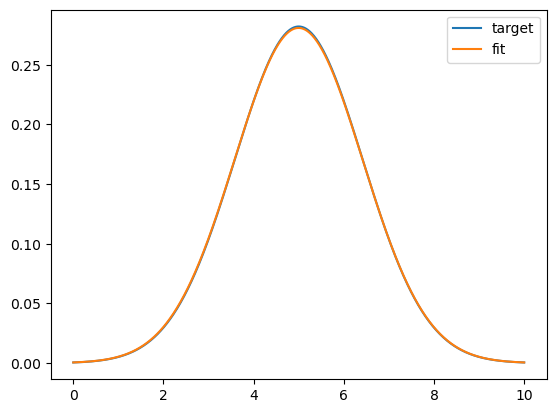

In [149]:
target_pdf = scipy.stats.norm(mean_target, log_var_target.exp().sqrt().numpy()).pdf(x)
fit_pdf = scipy.stats.norm(mean.detach().numpy(), log_var.exp().sqrt().detach().numpy()).pdf(x)

plt.plot(x, target_pdf, label="target")
plt.plot(x, fit_pdf, label="fit")
plt.legend()
plt.show()

# Exercise 3. Jensen-Shannon divergence

KL is not the only divergence for estimating difference between probability distributions. Another example is Jensen-Shannon divergence (JSD), which is defined as
$$
\text{JS}(P, Q) = \frac{1}{2}\text{KL}(P, M) + \frac{1}{2}\text{KL}(Q, M),
$$
where $M = \frac{1}{2}(P + Q)$. Despite being symmetric, even for gaussians it is analytically intractable, hence numerical solutions are used. One option is to estimate corresponding KL terms by sampling from P and Q. $\textbf{Your task is to compute JSD between two gaussians by employing sampling}$. You can use scipy.stats package here.

In [150]:
def JSD(mean1, sigma1, mean2, sigma2, N):
    """
    Args:
        mean1: mean of normal distribution p
        sigma1: std of the normal distribution p 
        mean2: mean of normal distribution q
        sigma2: std of the normal distribution q
        N: number of simulations
        
    Returns:
        jsd
    """
    samples1 = np.random.randn(N) * sigma1 + mean1
    samples2 = np.random.randn(N) * sigma2 + mean2
    # YOUR CODE HERE

    p_pdf = lambda x: scipy.stats.norm.pdf(x, mean1, sigma1)
    q_pdf = lambda x: scipy.stats.norm.pdf(x, mean2, sigma2)
    m_pdf = lambda x: 0.5 * p_pdf(x) + 0.5 * q_pdf(x)

    kl_pm = np.mean(np.log(p_pdf(samples1)) -  np.log(m_pdf(samples1)))

    kl_qm = np.mean(np.log(q_pdf(samples2)) -  np.log(m_pdf(samples2)))

    jsd = 0.5 * (kl_pm + kl_qm)

    #raise NotImplementedError()
    return jsd

In [151]:
eps = 0.028
jsd = 0.545333

diff = abs(JSD(3,6, 10,0.5, 10000) - jsd)
assert diff < eps, \
print(f"jsd do not allign, the absolute value difference is {diff}")

print("Success")

Success


In [152]:
# Here is a hidden test


# Exercise 4. Monte-Carlo for area estimation

Monte-Carlo approaches are used for various tasks. One of them is area estimation, when the shape is complex. For this task, your are given figure that satisfies the following inequalities:

$$
\frac{x^2}{2} + \frac{y^2}{3} < 1 \\
x + y > -1 \\
x - y < 0
$$

$\textbf{Your task is to estimate its area}$. Sample $x$ and $y$ from uniform distributions over $[-2, 2]$ and compute the Monte-Carlo estimate.

In [153]:
def area(N):
    """
    Args:
        N: number of samples from uniform distributions
    Returns:
        x: sampled x values
        y: sampled y values
        mask: boolean array of size N where mask[i] is True if corresponding x_i and y_i satisfy inequalities
        area: estimated area
    """
    # YOUR CODE HERE
    x = np.random.uniform(-2, 2, N)
    y = np.random.uniform(-2, 2, N)
    
    mask = (x**2 / 2 + y**2 / 3 < 1) & (x + y > -1) & (x - y < 0)
    
    area = (np.sum(mask) / N) * 16  # Multiply by the area of the bounding box which is 16

    #raise NotImplementedError()
    return x,y,mask,area

In [154]:
# Here is a hidden test


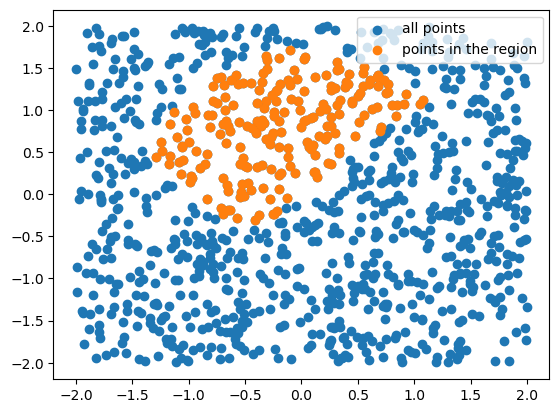

In [155]:
x,y,mask,area_ = area(1000)

plt.scatter(x,y, label="all points")
plt.scatter(x[mask], y[mask], label="points in the region")
plt.legend()
plt.show()

In [156]:
area_

3.248